# EXPLORATORY DATA ANALYSIS

A continuación extraeremos y exploraremos los datos proporcionados por https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales  sobre los siniestros en Argentina.

Para ello usaremos las librerias de pandas, y ydata_profiling.


In [7]:
# cargar librerias
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

In [8]:
#cargar datos de siniestros
df= pd.read_excel(r'./dataRaw/homicidios.xlsx')
print(df)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
0    2016-0001           1 2016-01-01  2016   1   1  04:00:00   4   
1    2016-0002           1 2016-01-02  2016   1   2  01:15:00   1   
2    2016-0003           1 2016-01-03  2016   1   3  07:00:00   7   
3    2016-0004           1 2016-01-10  2016   1  10  00:00:00   0   
4    2016-0005           1 2016-01-21  2016   1  21  05:20:00   5   
..         ...         ...        ...   ...  ..  ..       ...  ..   
691  2021-0093           1 2021-12-13  2021  12  13  17:10:00  17   
692  2021-0094           1 2021-12-20  2021  12  20  01:10:00   1   
693  2021-0095           1 2021-12-30  2021  12  30  00:43:00   0   
694  2021-0096           1 2021-12-15  2021  12  15  10:30:00  10   
695  2021-0097           1 2021-11-18  2021  11  18  06:10:00   6   

                               LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
0    AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...     NaN   
1            AV G

## ANALISIS DEL DATAFRAME

las columnas contienen:
ID = numero de identificación del siniestro.

N_VICTIMAS = número de fallecidos en el siniestro

FECHA = fecha del siniestro

AAAA = año del siniestro

MM	= mes del siniestro

DD	= dia del siniestro

HORA = hora exacta del siniestro	

HH	= hora del siniestro

LUGAR_DEL_HECHO = calles donde fue el siniestro

TIPO_DE_CALLE = tipo de calle donde fue el siniestro

Calle = nombre de la calle donde fue el siniestro

Altura	
    
Cruce = calles donde fue el siniestro

Dirección Normalizada = calles donde fue el siniestro

COMUNA	= numero de comuna donde fue el siniestro

XY (CABA)	= coordenadas del siniestreo 

pos x	= coordenadas longitud del siniestreo 

pos y	= coordenadas altitud del siniestreo 

PARTICIPANTES	= tipo de vehiculos que participaron en el siniestro

VICTIMA	= tipo de vehiculo impactado en el siniestro

ACUSADO = tipo de vehiculo impactante que realizó en el siniestro


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

### Tipos de valores

objetos genericos( normalmente str): ID, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Cruce, Dirección Normalizada, XY (CABA), pos x, pos y, PARTICIPANTES, VICTIMA	ACUSADO

valores tipo Int= N_VICTIMAS, AAAA, MM, DD, COMUNA

valores tipo float = Altura

Valores tipo date = FECHA	


## Datos redundantes

1. Se puede observar que las columnas 'AAAA'	'MM'	'DD' son desgloce de 'FECHA'.

2. Las columna'HORA' contiene horas, minutos y segundos, y la culmna	HH  solo horas.

3. Se puede observar que las columnas 'pos x'	'pos y' son desgloce de 'XY (CABA)'.

4. Se puede observar que las columnas 'VICTIMA' 'ACUSADO' son desgloce de 'PARTICIPANTES'.

5. 'LUGAR_DEL_HECHO' 'calle' 'Cruce' 'Dirección Normalizada'  contienen la misma informacion pero en diferente formato.


Recomendación conservar: 
1. Columnas 'AAAA'	'MM' 'DD', al ser mas facil de agrupar.
2. Columna HH al contener información vital.
3. Se pueden eliminar la 'XY (CABA)'
4. Columnas 'VICTIMA' 'ACUSADO' al ser mas facil de agrupar y contabilizar.
5. 'LUGAR_DEL_HECHO'  al ser el que contiene más datos y 'calle' ya que es donde sucedio el siniestro.




## datos vacios
Como podemos ver en la linea 10, tenemos que maximo tenemos 696 valores por columna. 

Al ver que 'Altura' tiene  129, 'Calle' 695, 'Cruce' 525 y 'Dirección Normalizada' 688;

por lo que se recomienda que elimine 'Altura'.

# Limpieza de los datos

In [9]:
#eliminar columnas innecesarias
df.drop(columns={'FECHA',	'HORA',	'Altura'	,'Cruce',	'Dirección Normalizada',	'XY (CABA)',	'PARTICIPANTES'}, inplace=True)
df.head()

,ID,N_VICTIMAS,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",9,-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,1,-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,8,-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,1,-58.38718297,-34.62246630,MOTO,PASAJEROS


# Valores atipicos


In [35]:

#datos unicos
print(df['N_VICTIMAS'].unique())
print(df['AAAA'].unique())
print(df['MM'].unique())
print(df['DD'].unique())
print(df['COMUNA'].unique())
print(df['VICTIMA'].unique())
print(df['ACUSADO'].unique())
print(df['Calle'].unique())



[1 2 3]
[2016 2017 2018 2019 2020 2021]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3 10 21 24 29  8 14 15 17 28  4 12 13 19 23 30 31 11 20 22 25 26
 16 18 27  7  9  5  6]
[ 8  9  1 11 15  4  7 12  3 13 14 10  6  2  5  0]
['MOTO' 'AUTO' 'PEATON' 'SD' 'CARGAS' 'BICICLETA' 'PASAJEROS' 'MOVIL'
 'OBJETO FIJO' 'PEATON_MOTO']
['AUTO' 'PASAJEROS' 'SD' 'OBJETO FIJO' 'CARGAS' 'MOTO' 'MULTIPLE' 'OTRO'
 'BICICLETA' 'TREN']
['PIEDRA BUENA AV.' 'PAZ, GRAL. AV.' 'ENTRE RIOS AV.' 'LARRAZABAL AV.'
 'SAN JUAN AV.' '27 DE FEBRERO AV.' 'NOGOYA' 'BELGRANO AV.'
 'SCALABRINI ORTIZ, RAUL AV.' 'REGIMIENTO DE PATRICIOS AV.'
 'ACOSTA, MARIANO' 'DE LA TORRE, LISANDRO' 'SUIPACHA' 'DIRECTORIO AV.'
 '9 DE JULIO AV.' 'HOLMBERG' 'CURAPALIGUE AV.' 'VIAMONTE' 'CABILDO AV.'
 'ALCORTA, AMANCIO AV.' 'CORRIENTES AV.' 'HERRERA' 'LAFUENTE AV.'
 'MITRE, BARTOLOME' 'DELLEPIANE, LUIS, TTE. GRAL.'
 'MORENO, JOSE MARIA AV.' 'LIMA'
 'AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI' 'GORDILLO, TIMOTEO'
 'LUGONES, LEOPOLDO AV.' 'TRIUNV

# DISMINUCION DE LOS DATOS A SOLO LO NECESARIO.

Dado que solo se analizara el año del 2021, para el primer KPI se extraera solo esos datos.

Y para el segundo KPI se consideraran también los datos del 2020

In [4]:
# Filtrar filas donde la columna 'AAAA' es igual a 2016
df_2021 = df.loc[df['AAAA'] == 2021]

df_2021.info()


<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 599 to 695
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               97 non-null     object
 1   N_VICTIMAS       97 non-null     int64 
 2   AAAA             97 non-null     int64 
 3   MM               97 non-null     int64 
 4   DD               97 non-null     int64 
 5   HH               97 non-null     object
 6   LUGAR_DEL_HECHO  97 non-null     object
 7   TIPO_DE_CALLE    97 non-null     object
 8   Calle            97 non-null     object
 9   COMUNA           97 non-null     int64 
 10  pos x            97 non-null     object
 11  pos y            97 non-null     object
 12  VICTIMA          97 non-null     object
 13  ACUSADO          97 non-null     object
dtypes: int64(5), object(9)
memory usage: 11.4+ KB


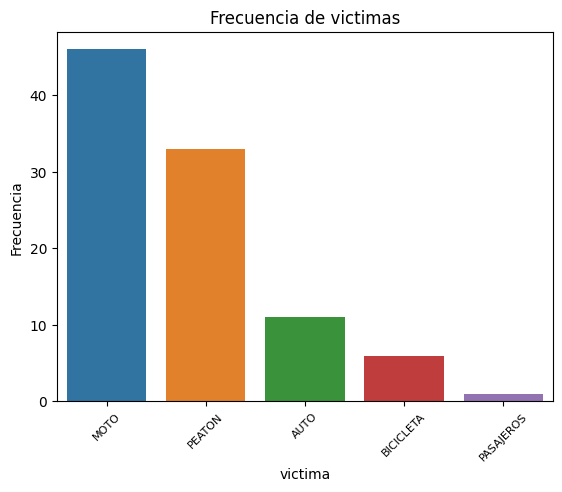

In [24]:
# analisis de frecuencia de victimas en choques.
frecuencias = df_2021['VICTIMA'].value_counts()
sns.barplot(x=frecuencias.index, y=frecuencias)
plt.xticks(rotation=45,  fontsize=8)
plt.xlabel('victima')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de victimas')
plt.show()

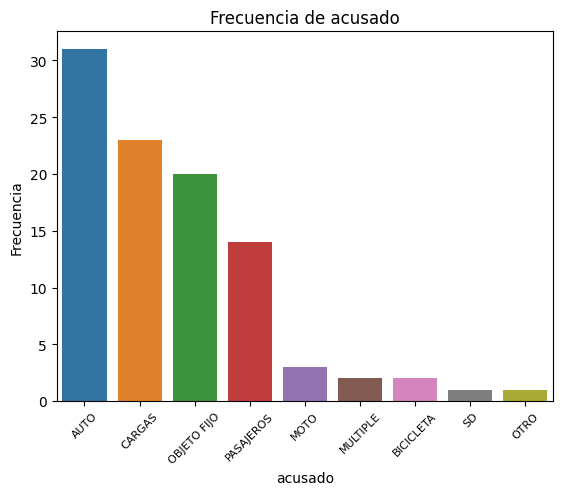

In [25]:
# analisis de frecuencia de acusados en siniestros.
frecuencias = df_2021['ACUSADO'].value_counts()
sns.barplot(x=frecuencias.index, y=frecuencias)
plt.xticks(rotation=45,  fontsize=8)
plt.xlabel('acusado')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de acusado')
plt.show()

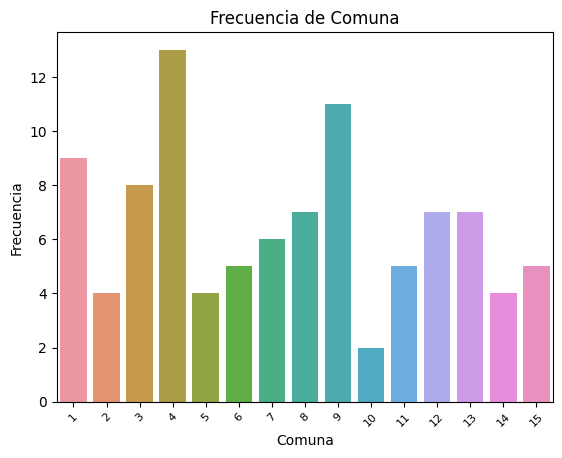

In [27]:
frecuencias = df_2021['COMUNA'].value_counts()
sns.barplot(x=frecuencias.index, y=frecuencias)
plt.xticks(rotation=45,  fontsize=8)
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Comuna')
plt.show()

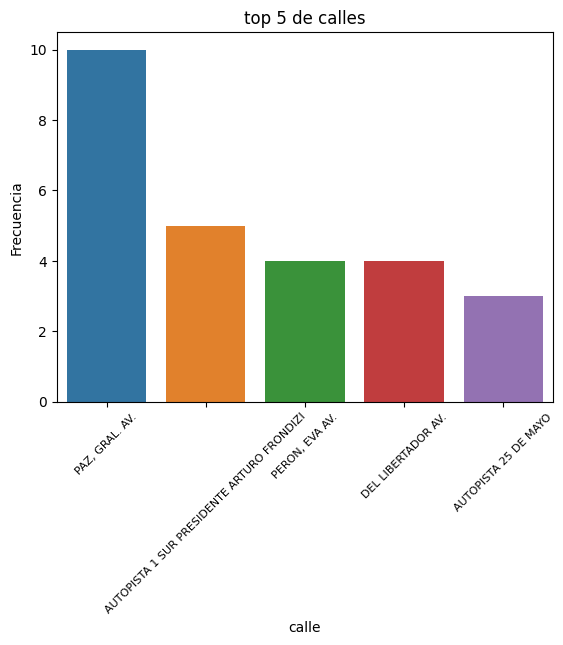

In [28]:
frecuencias = df_2021['Calle'].value_counts()
frecuencias = frecuencias.sort_values( ascending=False)
frecuencias= frecuencias.head(5)
sns.barplot(x=frecuencias.index, y=frecuencias)
plt.xticks(rotation=45,  fontsize=8)
plt.xlabel('calle')
plt.ylabel('Frecuencia')
plt.title('top 5 de calles')
plt.show()

# Conclusión:

no se encontro rastros de valores atipicos, por lo que se procede a guardar la base de datos

In [18]:
# Se extrae los datos del 2020
df_2020 = df.loc[df['AAAA'] == 2020]
# se concatena df_2020 y df_2021
df_20_21 = pd.concat([df_2020,df_2021], ignore_index=True)

df_20_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               175 non-null    object
 1   N_VICTIMAS       175 non-null    int64 
 2   AAAA             175 non-null    int64 
 3   MM               175 non-null    int64 
 4   DD               175 non-null    int64 
 5   HH               175 non-null    object
 6   LUGAR_DEL_HECHO  175 non-null    object
 7   TIPO_DE_CALLE    175 non-null    object
 8   Calle            175 non-null    object
 9   COMUNA           175 non-null    int64 
 10  pos x            175 non-null    object
 11  pos y            175 non-null    object
 12  VICTIMA          175 non-null    object
 13  ACUSADO          175 non-null    object
dtypes: int64(5), object(9)
memory usage: 19.3+ KB


In [7]:
df_2021.to_csv('homicidiosclean_2021.csv',index=False)
df_20_21.to_csv('homicidiosclean_20y21.csv',index=False)


In [1]:
import pandas as pd
df_20_21 = pd.read_csv('homicidiosclean_20y21.csv')
df= pd.read_csv('homicidiosclean_incompleto.csv')
df.head(1)

,ID,N_VICTIMAS,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,-58.47533969,-34.68757022,MOTO,AUTO


In [3]:
df_20_21.tail()

,ID,N_VICTIMAS,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,pos x,pos y,VICTIMA,ACUSADO
170,2021-0093,1,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,7,-58.43353773,-34.64561636,MOTO,AUTO
171,2021-0094,1,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",9,-58.46739825,-34.65117757,MOTO,AUTO
172,2021-0095,1,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,11,-58.47293407,-34.61984745,MOTO,CARGAS
173,2021-0096,1,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",9,-58.47066794,-34.65021673,AUTO,CARGAS
174,2021-0097,1,2021,11,18,6,PADRE CARLOS MUJICA 709,CALLE,PADRE CARLOS MUJICA,1,-58.37976155,-34.58679619,BICICLETA,AUTO


# relaciones

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'AUTO'),
  Text(1, 0, 'CARGAS'),
  Text(2, 0, 'OBJETO FIJO'),
  Text(3, 0, 'MOTO'),
  Text(4, 0, 'PASAJEROS'),
  Text(5, 0, 'SD'),
  Text(6, 0, 'OTRO'),
  Text(7, 0, 'MULTIPLE'),
  Text(8, 0, 'BICICLETA')])

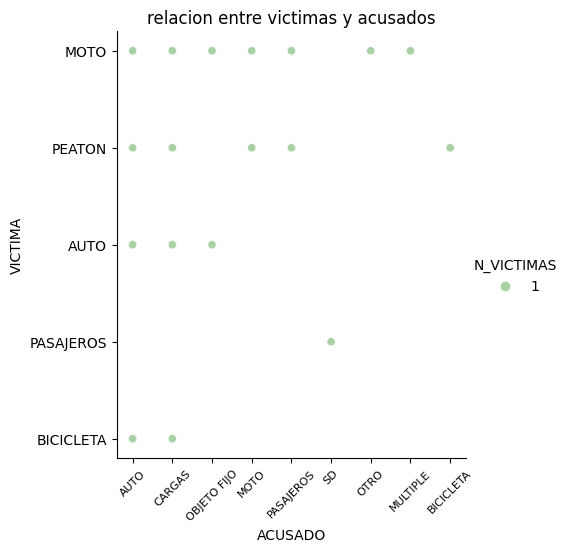

In [29]:
sns.relplot(
    data=df_2021,
    x="ACUSADO", y="VICTIMA",
    hue="N_VICTIMAS", palette="ch:r=-.5,l=.75"
)
plt.title('relacion entre victimas y acusados')
plt.xticks(rotation=45,  fontsize=8)

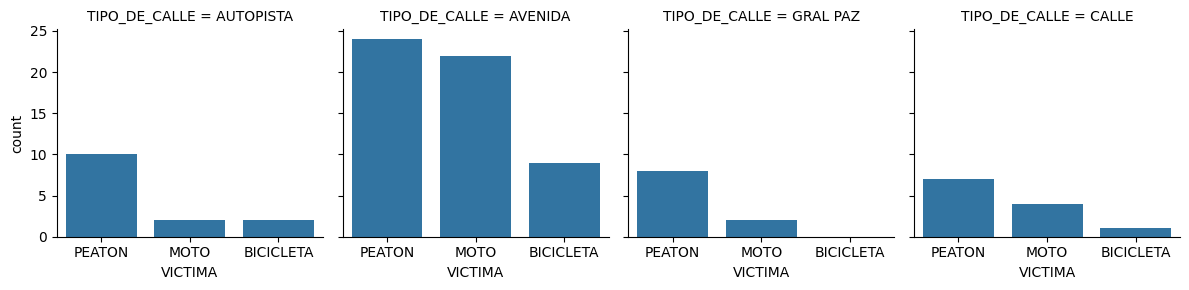

In [30]:
# relacion de calle con tipo de victimas
 
g = sns.FacetGrid(df_2021, col='TIPO_DE_CALLE')

# Count the occurrences of each victim type
g.map_dataframe(sns.countplot, x='VICTIMA')

# Muestra la matriz de gráficos
plt.show()
